# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [ ]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3
BS = 32

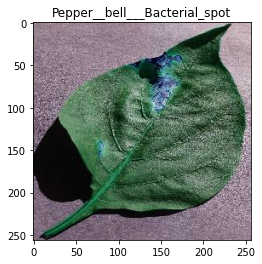

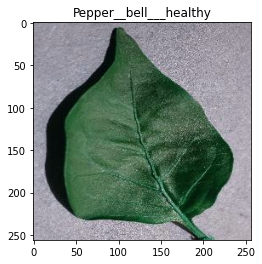

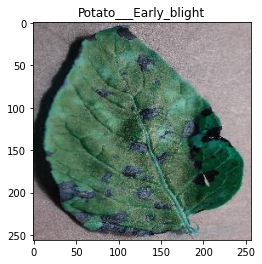

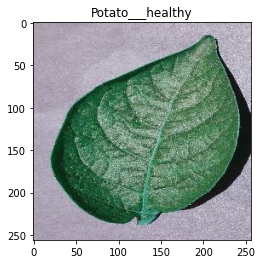

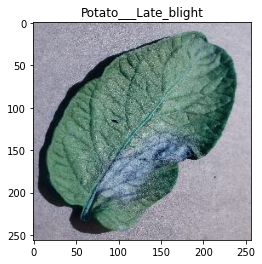

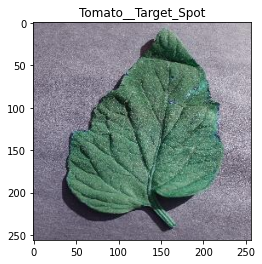

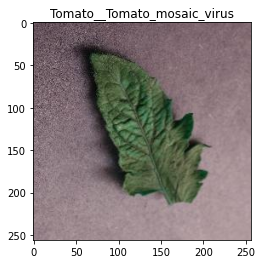

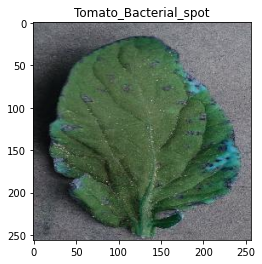

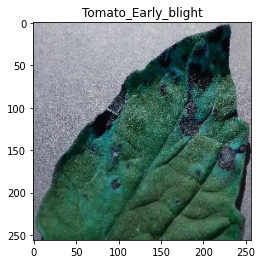

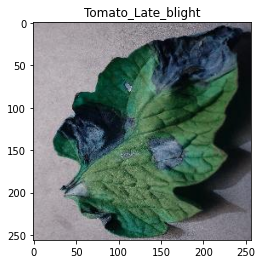

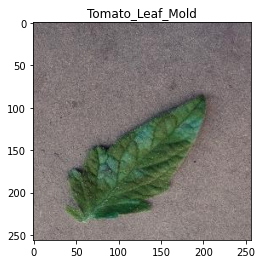

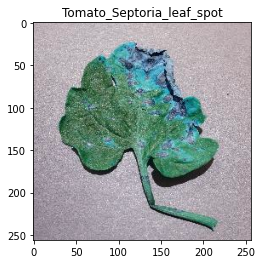

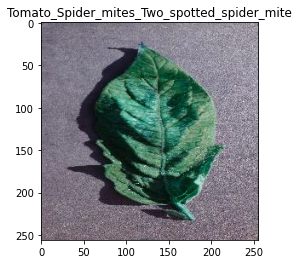

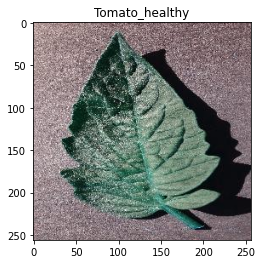

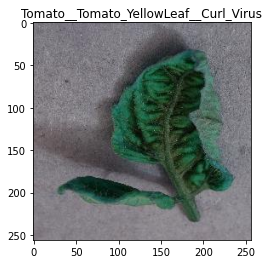

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Plantvillage'

for cat in os.listdir(DATA_PATH):
    path = os.path.join(DATA_PATH, cat)
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
        plt.imshow(image)
        plt.title(f'{cat}')
        plt.show()
        break

In [ ]:
img_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True,
                                 shear_range=0.2, validation_split=0.25)

train_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='training', 
                                                  class_mode='sparse', shuffle=True) 

val_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=BS, subset='validation', 
                                                  class_mode='sparse', shuffle=True)

Found 15185 images belonging to 15 classes.
Found 5057 images belonging to 15 classes.


In [ ]:
train_data_gen.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [ ]:
class_names = list(train_data_gen.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

## Building the Model

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=val_data_gen,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 388s 8s/step - loss: 2.6098 - accuracy: 0.1489 - val_loss: 2.5076 - val_accuracy: 0.1719
Epoch 2/20
47/47 [==============================] - 352s 8s/step - loss: 2.4502 - accuracy: 0.1769 - val_loss: 2.4640 - val_accuracy: 0.2812
Epoch 3/20
47/47 [==============================] - 313s 7s/step - loss: 2.3982 - accuracy: 0.2247 - val_loss: 2.4312 - val_accuracy: 0.1979
Epoch 4/20
47/47 [==============================] - 293s 6s/step - loss: 2.2798 - accuracy: 0.2593 - val_loss: 2.0410 - val_accuracy: 0.3385
Epoch 5/20
47/47 [==============================] - 277s 6s/step - loss: 2.1373 - accuracy: 0.3045 - val_loss: 2.0130 - val_accuracy: 0.3958
Epoch 6/20
47/47 [==============================] - 241s 5s/step - loss: 1.8845 - accuracy: 0.3943 - val_loss: 1.8669 - val_accuracy: 0.3542
Epoch 7/20
47/47 [==============================] - 235s 5s/step - loss: 1.7804 - accuracy: 0.4156 - val_loss: 1.9076 - val_accuracy: 0.4219
Epoch 8/20
47

In [ ]:
model.save("/content/drive/MyDrive/model/img_gen_model.h5")

In [ ]:
import tensorflow as tf
loaded_model_h5 = tf.keras.models.load_model("/content/drive/MyDrive/model/img_gen_model.h5")

In [ ]:
loaded_model_h5.fit(
    train_data_gen,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=val_data_gen,
    validation_steps=6,
    verbose=1,
    epochs=5,
)

Epoch 1/5
47/47 [==============================] - 85s 2s/step - loss: 0.9083 - accuracy: 0.6935 - val_loss: 0.9585 - val_accuracy: 0.6823
Epoch 2/5
47/47 [==============================] - 78s 2s/step - loss: 0.7746 - accuracy: 0.7473 - val_loss: 0.7277 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 76s 2s/step - loss: 0.7896 - accuracy: 0.7201 - val_loss: 0.7009 - val_accuracy: 0.7865
Epoch 4/5
47/47 [==============================] - 66s 1s/step - loss: 0.7536 - accuracy: 0.7407 - val_loss: 0.6275 - val_accuracy: 0.7917
Epoch 5/5
47/47 [==============================] - 61s 1s/step - loss: 0.7830 - accuracy: 0.7440 - val_loss: 0.7338 - val_accuracy: 0.7604


In [ ]:
model.save("/content/drive/MyDrive/model/img_gen_model_v1.h5")

In [ ]:
loaded_model_h5 = tf.keras.models.load_model("/content/drive/MyDrive/model/img_gen_model_v1.h5")

In [ ]:
def predict_label(image):
    
    # model = tf.keras.models.load_model("/content/pepper_model.h5")

    image = np.array(Image.open(image).convert("RGB").resize((256, 256)))

    image = image/255 # normalize the image in 0 to 1 range

    img_array = tf.expand_dims(image, 0)
    predictions = loaded_model_h5.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return {"class": predicted_class, "confidence": confidence}

Scores is just a list containing loss and accuracy value

In [ ]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
val_acc

[0.4635416567325592,
 0.765625,
 0.859375,
 0.796875,
 0.8072916865348816,
 0.8333333134651184,
 0.890625,
 0.8854166865348816,
 0.9427083134651184,
 0.9270833134651184,
 0.875,
 0.96875,
 0.953125,
 0.9635416865348816,
 0.9635416865348816,
 0.9583333134651184,
 0.984375,
 0.8802083134651184,
 0.9583333134651184,
 0.9583333134651184]

In [ ]:
acc

[0.46200814843177795,
 0.6831750273704529,
 0.8018996119499207,
 0.8873812556266785,
 0.8113975524902344,
 0.8521031141281128,
 0.8948439359664917,
 0.9151967167854309,
 0.9151967167854309,
 0.9335142374038696,
 0.9402984976768494,
 0.9518317580223083,
 0.9708276987075806,
 0.9579375982284546,
 0.9626865386962891,
 0.9464043378829956,
 0.974219799041748,
 0.9599728584289551,
 0.9538670182228088,
 0.9715061187744141]

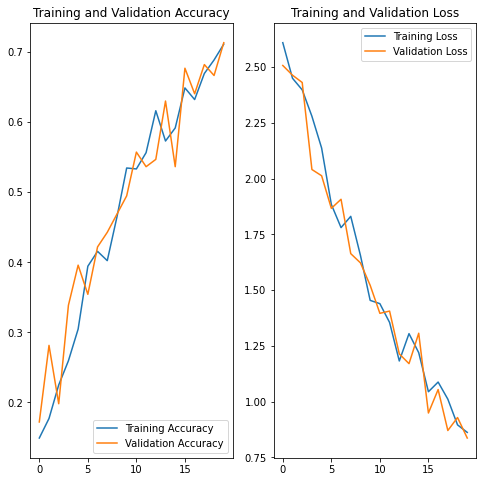

In [ ]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

**Now run inference on few sample images**

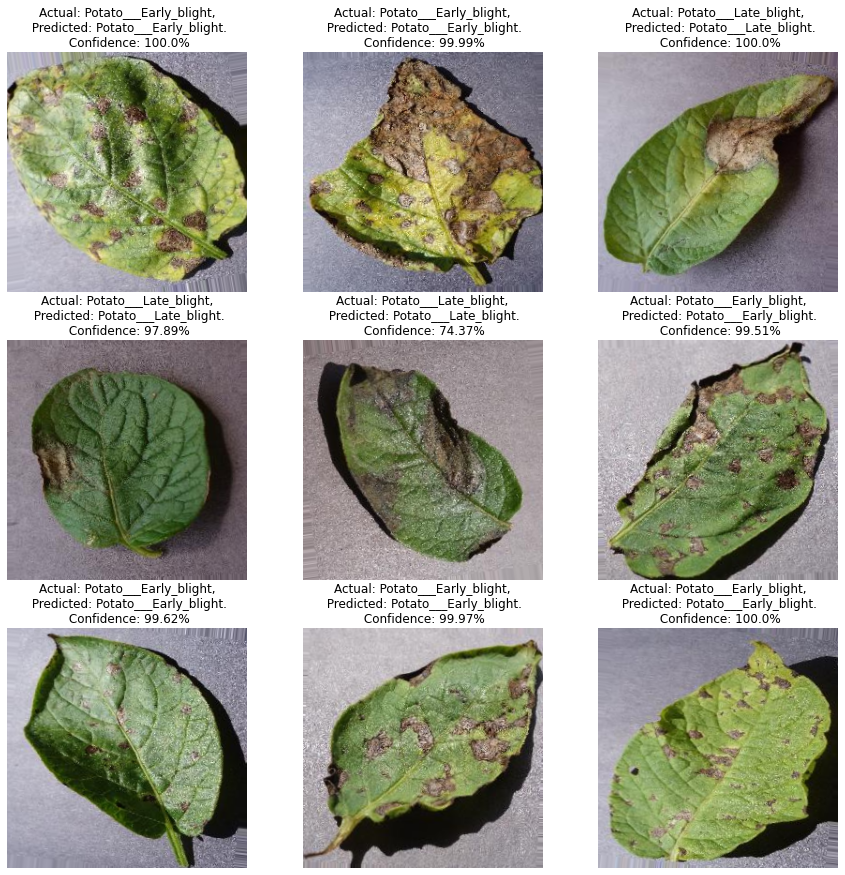

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [ ]:
model.save("../potatoes.h5")